<a href="https://colab.research.google.com/github/bahadirbesirkestane/Staj/blob/main/Naive_Bayes_S%C4%B1n%C4%B1fland%C4%B1rma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Gaussian Naive Bayes:** Eğer özelliklerimiz sürekli değer(continuous value) ise bu değerlerin bir gauss dağılımı veya diğer bir değişle normal dağılımdan örneklendiğini varsayıyoruz.

**Multinominal Naive Bayes:** Örneğin bir e-ticaret siteniz varsa pek çok kategoriniz olur. Çok sınıflı kategorileri -spor, kozmetik, giyim, petshop- sınıflandırmak için kullanılır.

**Bernoulli Naive Bayes:** Multinominal Naive Bayes’e benzer şekilde sınıflandırma yapar. Ancak tahminler sadece boolean(ikili) şekildedir. Evet/Hayır, Spam/Spam Değil, 1/0, Var/Yok gibi.


### **Gaussian Naive Bayes**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()

In [2]:
#Grafikleri satır aralarında görmek için
%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

In [4]:
X,y=make_blobs(100,2,centers=2,cluster_std=1.5)

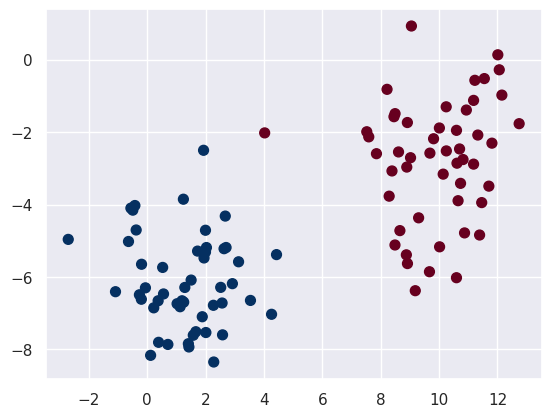

In [5]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu')

>Gauiisian Naive Bayes Algoritmasının import edilmesi

In [7]:
from sklearn.naive_bayes import GaussianNB

In [10]:
model=GaussianNB()

In [11]:
model.fit(X,y)

GaussianNB()

>Rastgele Yeni değerlerin alınması

In [13]:
rng=np.random.RandomState(0)
X_yeni=[-6,-14]+[14,18]*rng.rand(1000,2)

>Yeni verilerin kurduğumuz modele göre tahmin edilmesi.

In [14]:
y_yeni=model.predict(X_yeni)

>Saçılım grafiği. Gerçek veriler(Koyu Renkli noktalar) ile tahmin ettiğimiz(soluk renkli noktlar)verileri karşılaştırıyoruz.


(-3.4751136126806754,
 13.515583842506139,
 -8.809823776370035,
 1.3918140158582273)

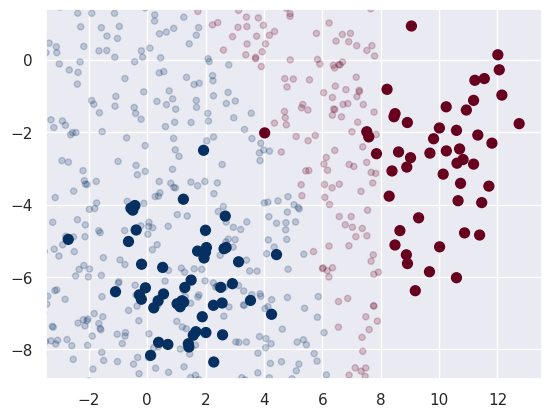

In [15]:
plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap='RdBu')
lim=plt.axis()
plt.scatter(X_yeni[:,0],X_yeni[:,1],c=y_yeni,s=20,cmap='RdBu',alpha=0.2)
plt.axis(lim)

### **Çoklu Naive Bayes**
En çok metin sınıflandırmada kullanılır.

In [39]:
from sklearn.datasets import fetch_20newsgroups
data=fetch_20newsgroups

In [40]:
kategoriler=['talk.religion.misc','soc.religion.christian','sci.space','comp.graphics']

In [41]:
train=fetch_20newsgroups(subset='train',categories=kategoriler)
test=fetch_20newsgroups(subset='test',categories=kategoriler)

In [42]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



>Makine öğrenmesinde bu veri setini kullanmak için her bir stringi bir sayısal vektöre dönüştürmek gerekiyor.

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

>Modelin oluşturulması.

In [47]:
model=make_pipeline(TfidfVectorizer(),MultinomialNB())


In [48]:
model.fit(train.data,train.target)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

>Test verisi için etiketlerin tahmin edilemesi.

In [49]:
etiketler=model.predict(test.data)

>Modelin Performansının değerlendirilmesi.

In [51]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(test.target,etiketler)


Text(109.44999999999996, 0.5, 'Tahmin Etiketleri')

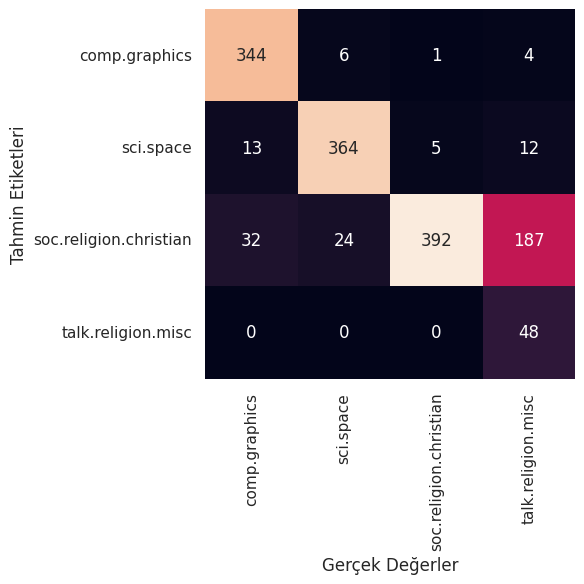

In [52]:
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,
            xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel("Gerçek Değerler")
plt.ylabel("Tahmin Etiketleri")


>Bir Stirngin içeriğini tahmin etme

In [54]:
def predict_category(s,train=train,model=model):
    pred=model.predict([s])
    return train.target_names[pred[0]]

In [55]:
predict_category("islam vs atheism")

'soc.religion.christian'

In [56]:
predict_category("determining the screen resolution")


'comp.graphics'